In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
data.shape

(1599, 12)

### Getting All Informationa about data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


 - All data type is ok with respect to their features. 

In [6]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

# EDA

#### Checking Null value

In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

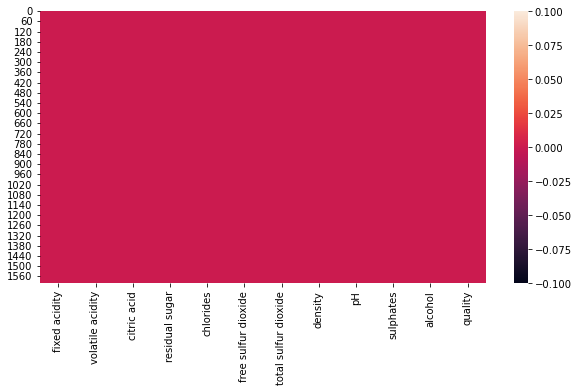

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull())
plt.show()

 - We can see that, there is no null values present in dataset.

<AxesSubplot:xlabel='quality', ylabel='count'>

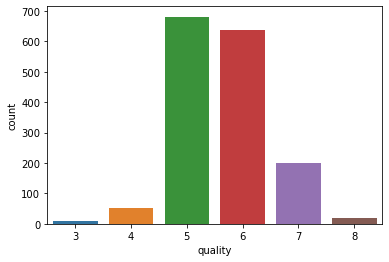

In [9]:
sns.countplot(x='quality', data = data,)


 - quality score 3 is minumum in quality.
 - 5 scored wine is the majority in this dataset followed by 6-score.
#### For balancing the data
- Quality rating lies in between 0 to 10.
- I will considered score < 7 is Bad quality wine and score >= 7 is good quality wine.


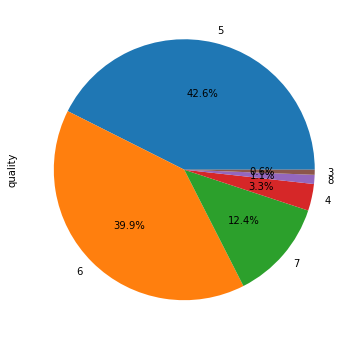

In [10]:
a = data['quality'].value_counts()
plt.figure(figsize=(15,6))
a.plot.pie(autopct="%1.1f%%")
plt.show()

 - We can see that,5 has contribute more than other.Its means qulity Score 5 have more than other.
 - Then after 6,7 and others.

In [11]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

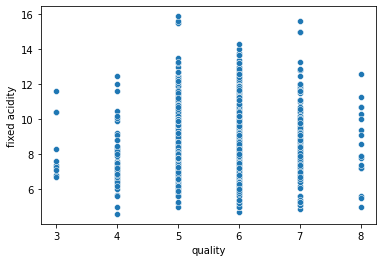

In [12]:
sns.scatterplot(x='quality', y='fixed acidity',data=data)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

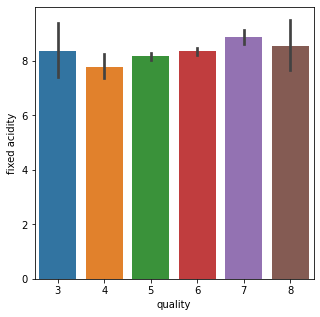

In [13]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'fixed acidity', data = data)

 - Fixed acidity is equal in the range of 7 to 11.
 - Fixed acidity is high for quality score 7.
 - we can see that,fixed acidity for almost all quality score is more than 7.8.

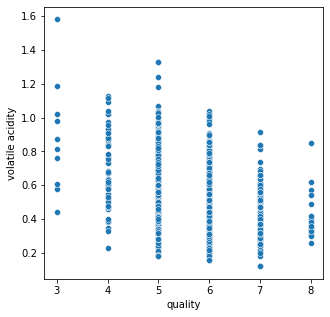

In [14]:
plot = plt.figure(figsize=(5,5))
sns.scatterplot(x='quality', y = 'volatile acidity', data = data)
plt.show()

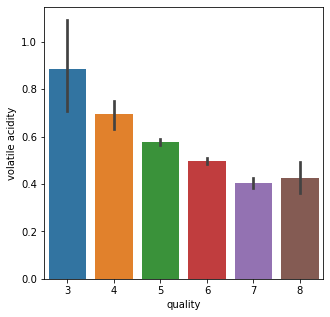

In [15]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = data)
plt.show()

 - Volatile acidity of  qulity score 3 have more then qulity score 4, 5 and other.
 - Volatile acidity is equal in the range of 0.4 to 0.9.
 - We can see that, volatile acidity is increses then quality score is decreases.

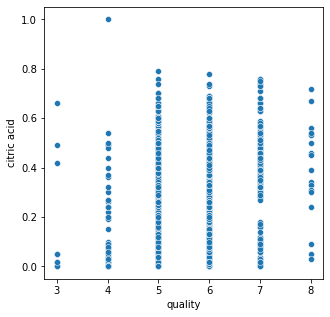

In [16]:
plot = plt.figure(figsize=(5,5))
sns.scatterplot(x='quality', y = 'citric acid', data = data)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

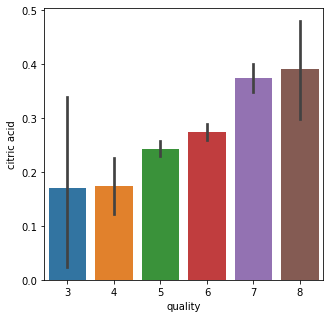

In [17]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = data)

 - Citric acid is have equal range of 0 to 0.6 for all quality score.
 - quality score 8 is have a high citric acid and quality score 3 is have low citric acid.

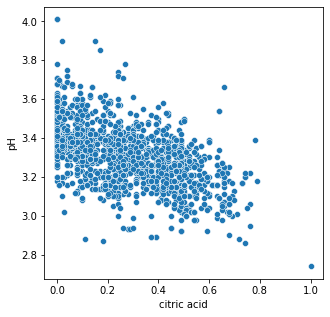

In [18]:
# Citric acid vs ph
plt.figure(figsize=(5,5))
sns.scatterplot(x='citric acid', y='pH',data=data)
plt.show()

 - If pH value is decreases then acidic nature of that solution is increases.
 - we can see, pH is increses then citric acid is decreases.
 - citric acid is 1 then pH value is around 2. and my citric acid 0 then pH value is 4.

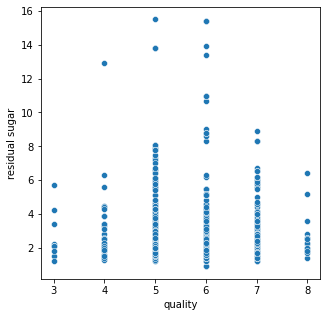

In [19]:
plot = plt.figure(figsize=(5,5))
sns.scatterplot(x='quality', y = 'residual sugar', data = data)
plt.show()

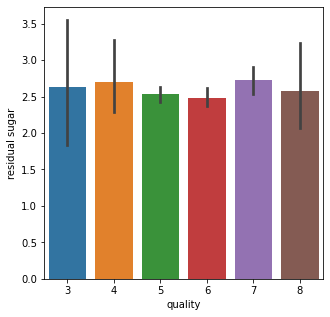

In [20]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'residual sugar', data = data)
plt.show()

 
 - Quality score 4 is have maximum residual sugar.
 - All quality score is lies almost in the same range

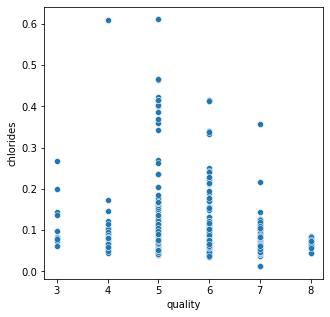

In [21]:
plot = plt.figure(figsize=(5,5))
sns.scatterplot(x='quality', y = 'chlorides', data = data)
plt.show()

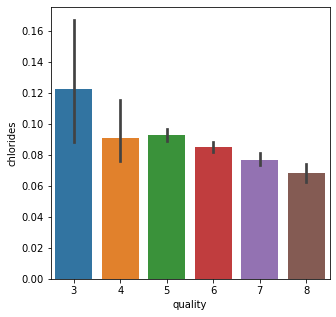

In [22]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'chlorides', data = data)
plt.show()

 - Chlorides contain is high in quality score 3 and low in quality score 4.
 - As we see, chlorides contain increases then quality is decreases.

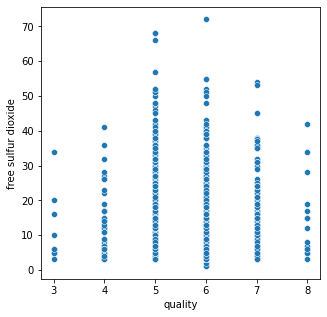

In [23]:
plot = plt.figure(figsize=(5,5))
sns.scatterplot(x='quality', y = 'free sulfur dioxide', data = data)
plt.show()

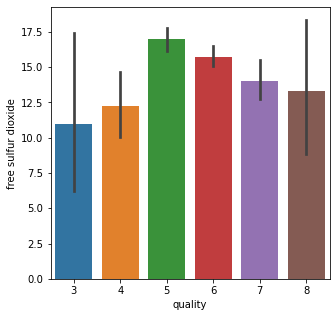

In [24]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'free sulfur dioxide', data = data)
plt.show()

 - 1 to 35 in this range,free sulfur dioxide is equal to all quality score.
 - quality score 5 is have high free sulfur dioxide and low in quality score 3.

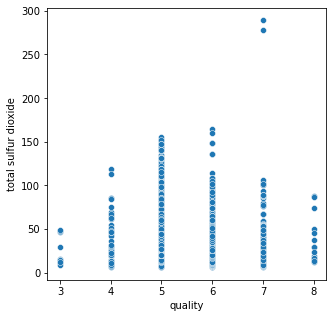

In [25]:
plot = plt.figure(figsize=(5,5))
sns.scatterplot(x='quality', y = 'total sulfur dioxide', data = data)
plt.show()

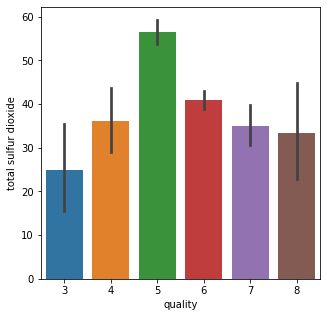

In [26]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'total sulfur dioxide', data = data)
plt.show()

 - Total sulfur dioxide is high for quality score 5.

In [27]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

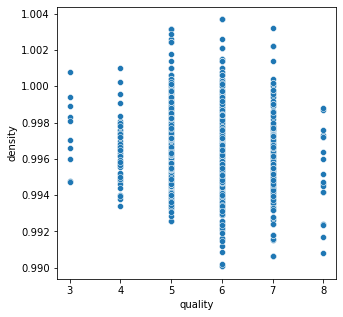

In [28]:
plot = plt.figure(figsize=(5,5))
sns.scatterplot(x='quality', y = 'density', data = data)
plt.show()

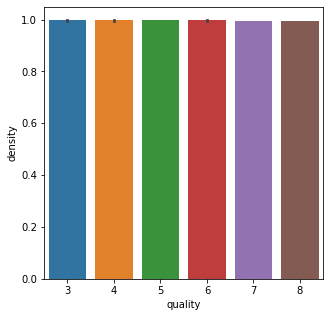

In [29]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'density', data = data)
plt.show()

 - we can see that density for all quality score is equal.

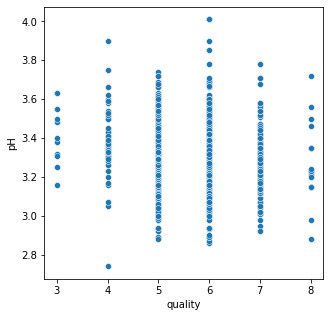

In [30]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='quality', y = 'pH', data = data)
plt.show()

 - 3.18 to 3.65 in this range, the pH value is equal to all quality score.
 - quality score 6 is have high ph value.

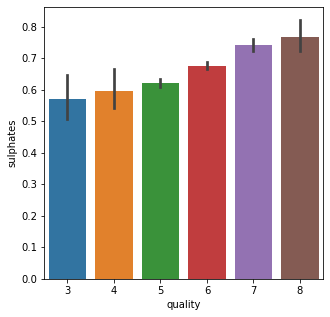

In [31]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'sulphates', data = data)
plt.show()

 - Sulphates is high for quality score 8 and low for quality score 3.
 - We can see that, sulphates contain is increases as quality score also increases.

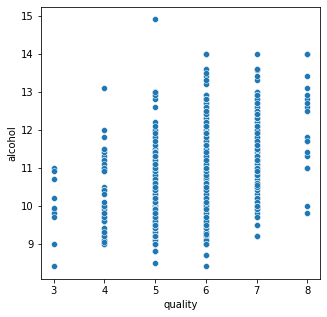

In [32]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='quality', y = 'alcohol', data = data)
plt.show()

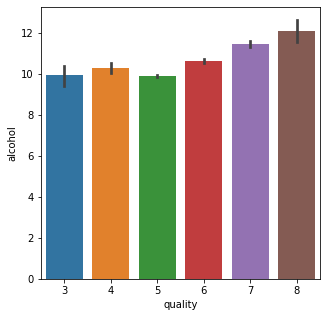

In [33]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'alcohol', data = data)
plt.show()

 - Alcohol is high for quality score 8 and low for quality score 3.
 - We can see that, alcohol contain is increases as quality score also increases.

## Describe the Dataset

In [34]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


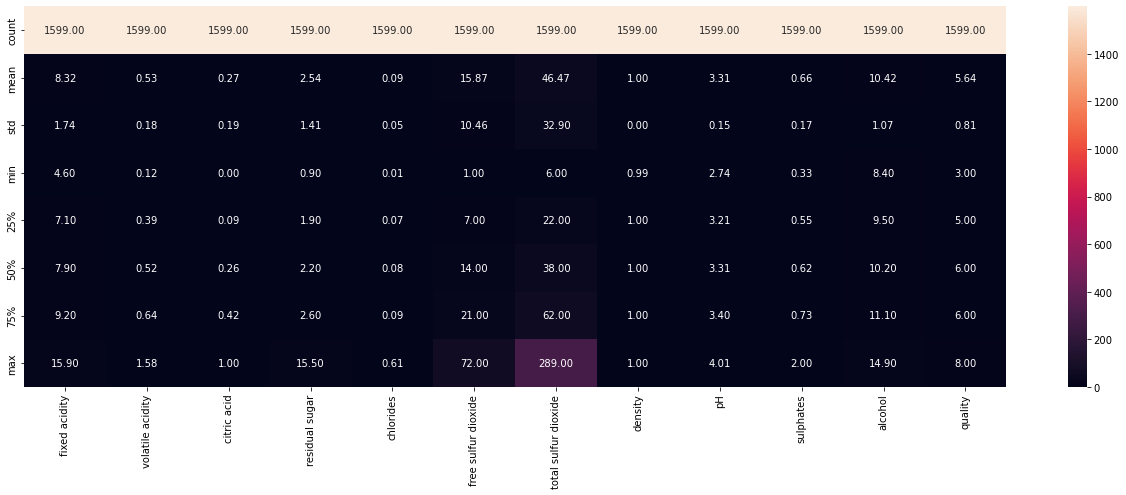

In [35]:
plt.figure(figsize=(22,7))
sns.heatmap(data.describe(), annot=True, fmt="0.2f")
plt.show()

## Outcome of describe of datasets:

From the above plotting we are determining mean, standard deviation, minimum, and maximum value of each column. It helps us further in data cleaning.

Total Number of row in the datasets:
  1. 1599 rows
  2. 12 columns
  
fixed acidity:
  1. Mean= 8.319637
  2. std = 1.741096	
  3. max_value = 15.900000
  4. min_value = 4.600000	
  
volatile acidity:
  1. Mean = 0.527821	
  2. std = 0.179060
  3. max_value = 1.580000
  4. min_value = 0.120000
  
citric acid:
  1. Mean = 0.270976
  2. std = 0.194801
  3. max_vakue = 1.000000
  4. min_value = 0.0000
  
residual sugar:
  1. Mean = 2.538806		
  2. std = 1.409928	
  3. max_value = 15.500000
  4. min_value = 0.900000
 
 
chlorides:
  1. Mean = 0.087467	
  2. std = 0.047065	
  3. max_value = 0.611000	
  4. min_value = 0.012000	 
  
free sulfur dioxide:
  1. Mean = 15.874922
  2. std = 10.460157
  3. max_value = 72.000000
  4. min_value = 1.000000
- We can see, there is large difference between max_value and min_value.
  
total sulfur dioxide:
  1. Mean = 46.467792	
  2. std = 32.895324
  3. max_value = 289.000000
  4. min_value = 6.000000
- We can see that, there is large difference between max_value and min_value.
- less difference in mean and standard deviation.
  
Density:
  1. Mean = 0.996747	
  2. std = 0.001887	
  3. max_value = 1.003690
  4. min_value = 0.990070	
  
pH:
  1. Mean = 3.311113	
  2. std = 0.154386
  3. max_value = 4.010000
  4. min_value = 2.740000	
  
sulphates:
  1. Mean = 0.658149
  2. std = 0.169507
  3. max_value = 2.000000
  4. min_value = 0.330000
  
alcohol:
  1. Mean = 10.422983	
  2. std = 1.065668
  3. max_value = 14.900000	
  4. min_value = 8.400000

## Correlation of the features with target column

In [36]:
data.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

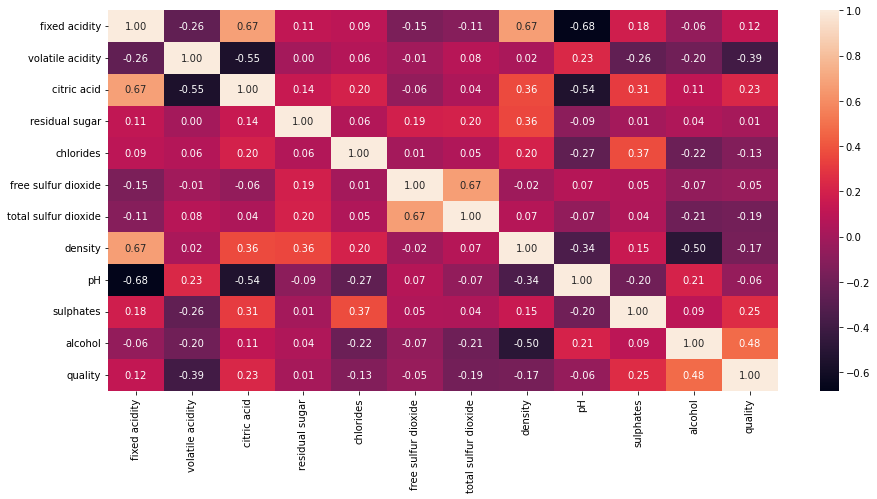

In [37]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, fmt ='.2f')
plt.show()

### Outcome of Correlation with target column:

  1. Fixed acidity has 12% positive correlation with the target column.
  2. Volatile acidity has 39% negative correlation with the target column.
  3. Citric acid has 23% positive correlation with the target column.
  4. Residual sugar has 1% positive correlation with the target column.
  5. Chlorides has 13% negative correlation with target column.
  6. Free sulfur dioxide has 0.5% negative correlation with target column.
  7. Total sulfur dioxide has 19% negative correlation with target column.
  8. Density has 19% negative correlation with target column.
  9. pH has 0.6% negative correlation with target column.
  10. Sulphates has 25% positive correlation with target column.
  11. Alcohol has 48% positive correlation with target column.

#### Correlation with features

 1. Fixed acidity has 67% positive correlation with density.
 2. Free sulfur dioxide 67% positive correaltion with total sulfur dioxide.
 3. Citric acid 67% positive correlation with fixed acidity.
 4. pH 68% negative correlation with fixed acidity.

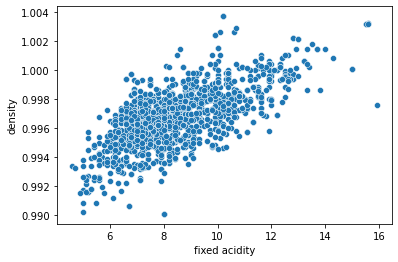

In [38]:
sns.scatterplot(x='fixed acidity',y='density',data=data)
plt.show()

 - We can see, fixed acidity is have a linear relationship with density.
 - I will drop one of these feature while feature selection

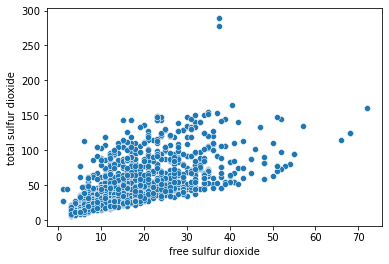

In [39]:
sns.scatterplot(x='free sulfur dioxide', y='total sulfur dioxide', data=data)
plt.show()

 - We can see, free sulfur dioxide is have a linear relation with total sulfur dioxide. 
 - I will drop one of these feature while feature selection

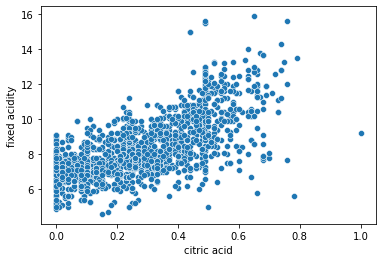

In [40]:
sns.scatterplot(x='citric acid', y='fixed acidity', data=data)
plt.show()

 - fixed acidity and citric acid have linear relation with each other.
 - I will drop one of these feature while feature selection
 

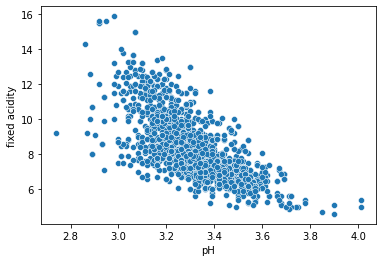

In [41]:
sns.scatterplot(x='pH', y='fixed acidity',data=data)
plt.show()

 - We can see that, pH is have negative linear relation with fixed acidity.
 - I will drop one of these feature while feature selection

## Checking distribution of data

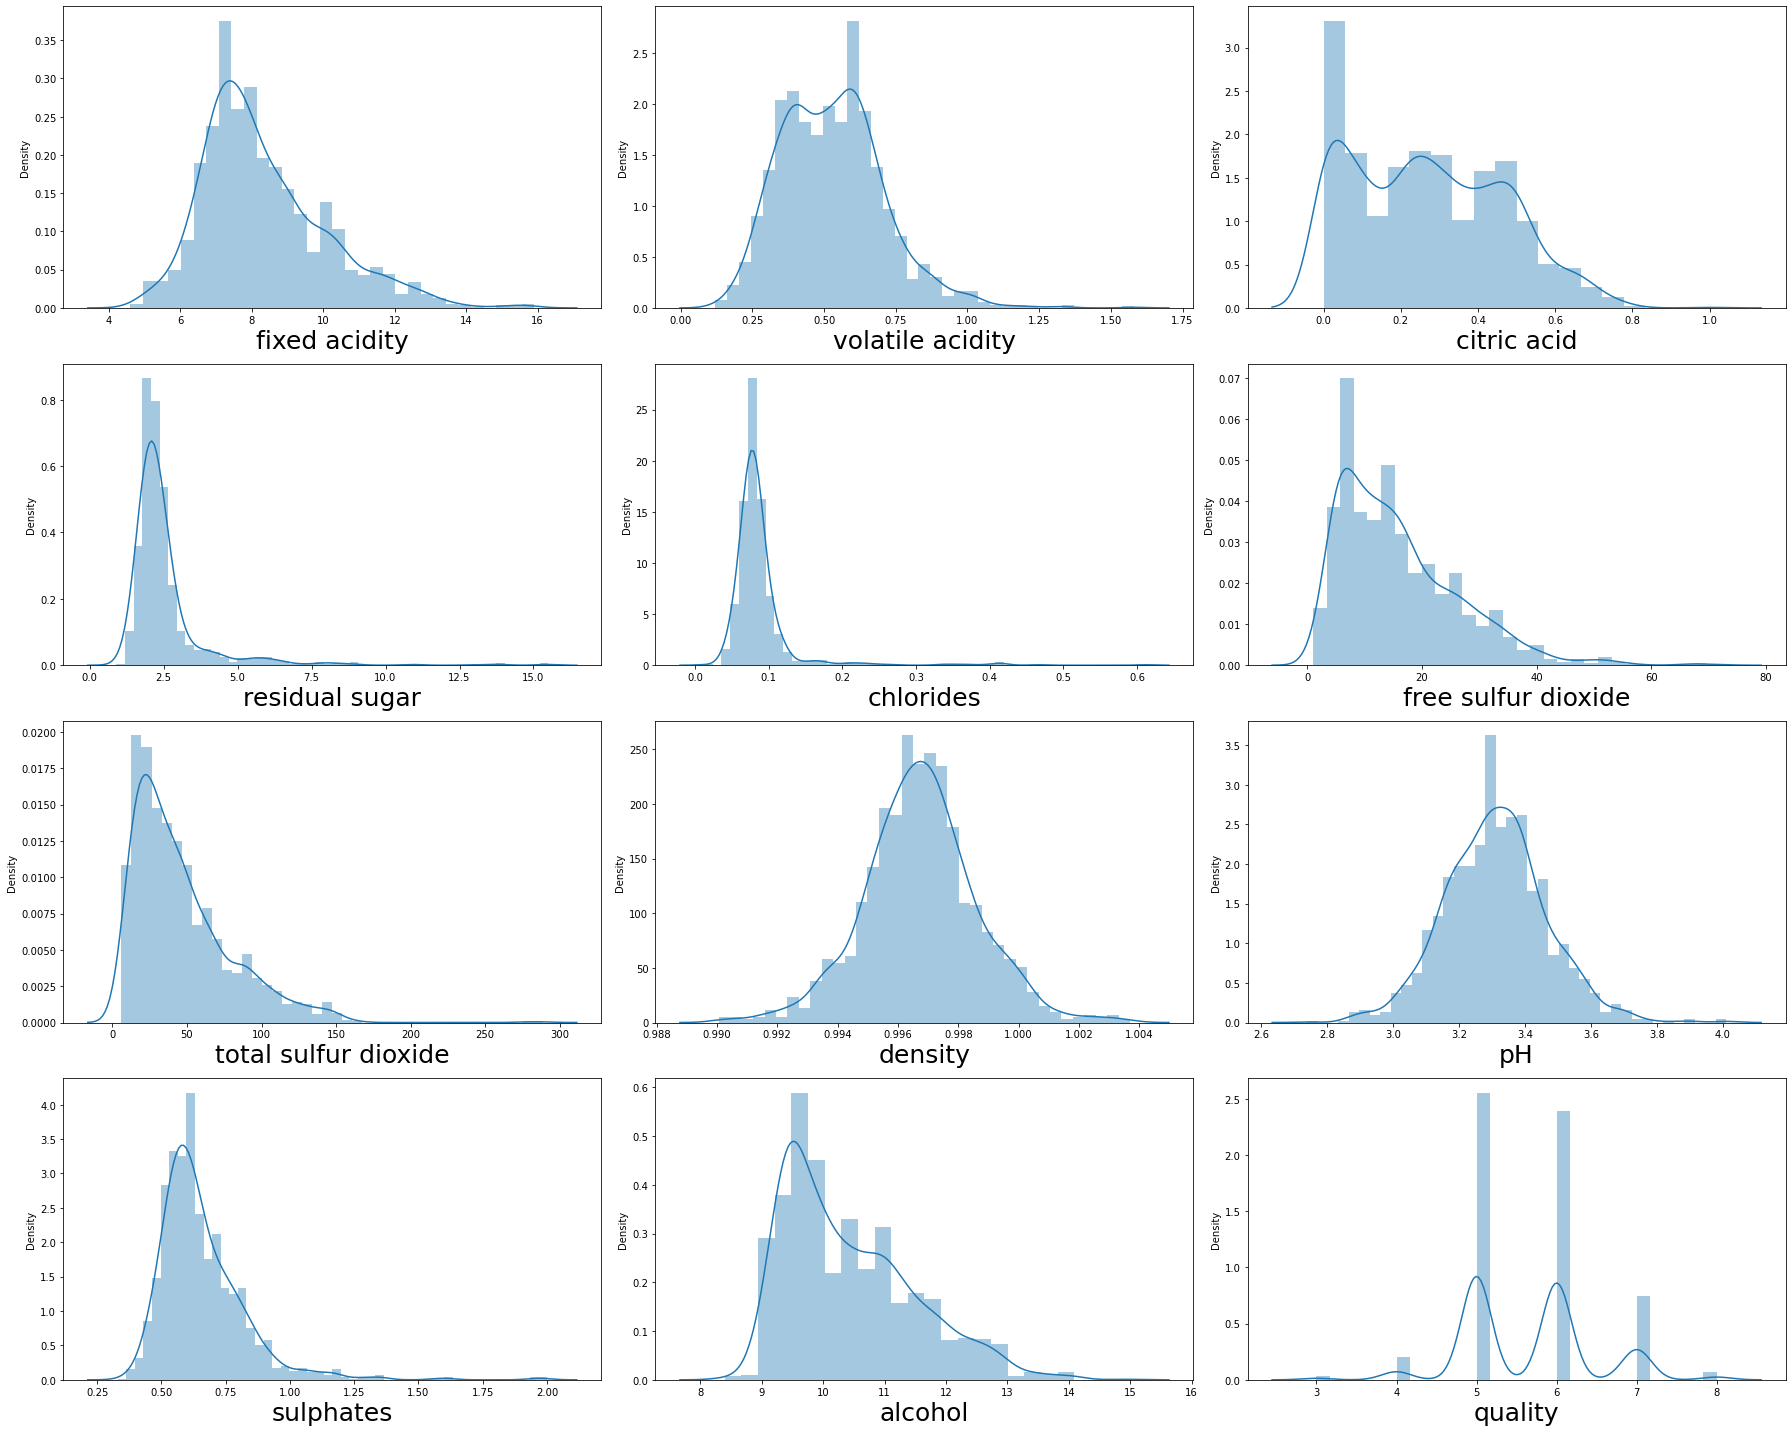

In [42]:
plt.figure(figsize=(25,20))
plotnumber = 1

for column in data:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=25)
    plotnumber +=1
plt.tight_layout()

In [43]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

 - Outcome of the skewness: Skewness threshold is taken is +/-0.65.
 - All features is having positve skewness.
 - From distribution almost all columns having skewness.
 - Density, pH is having normal distribution.

## Checking Outliers

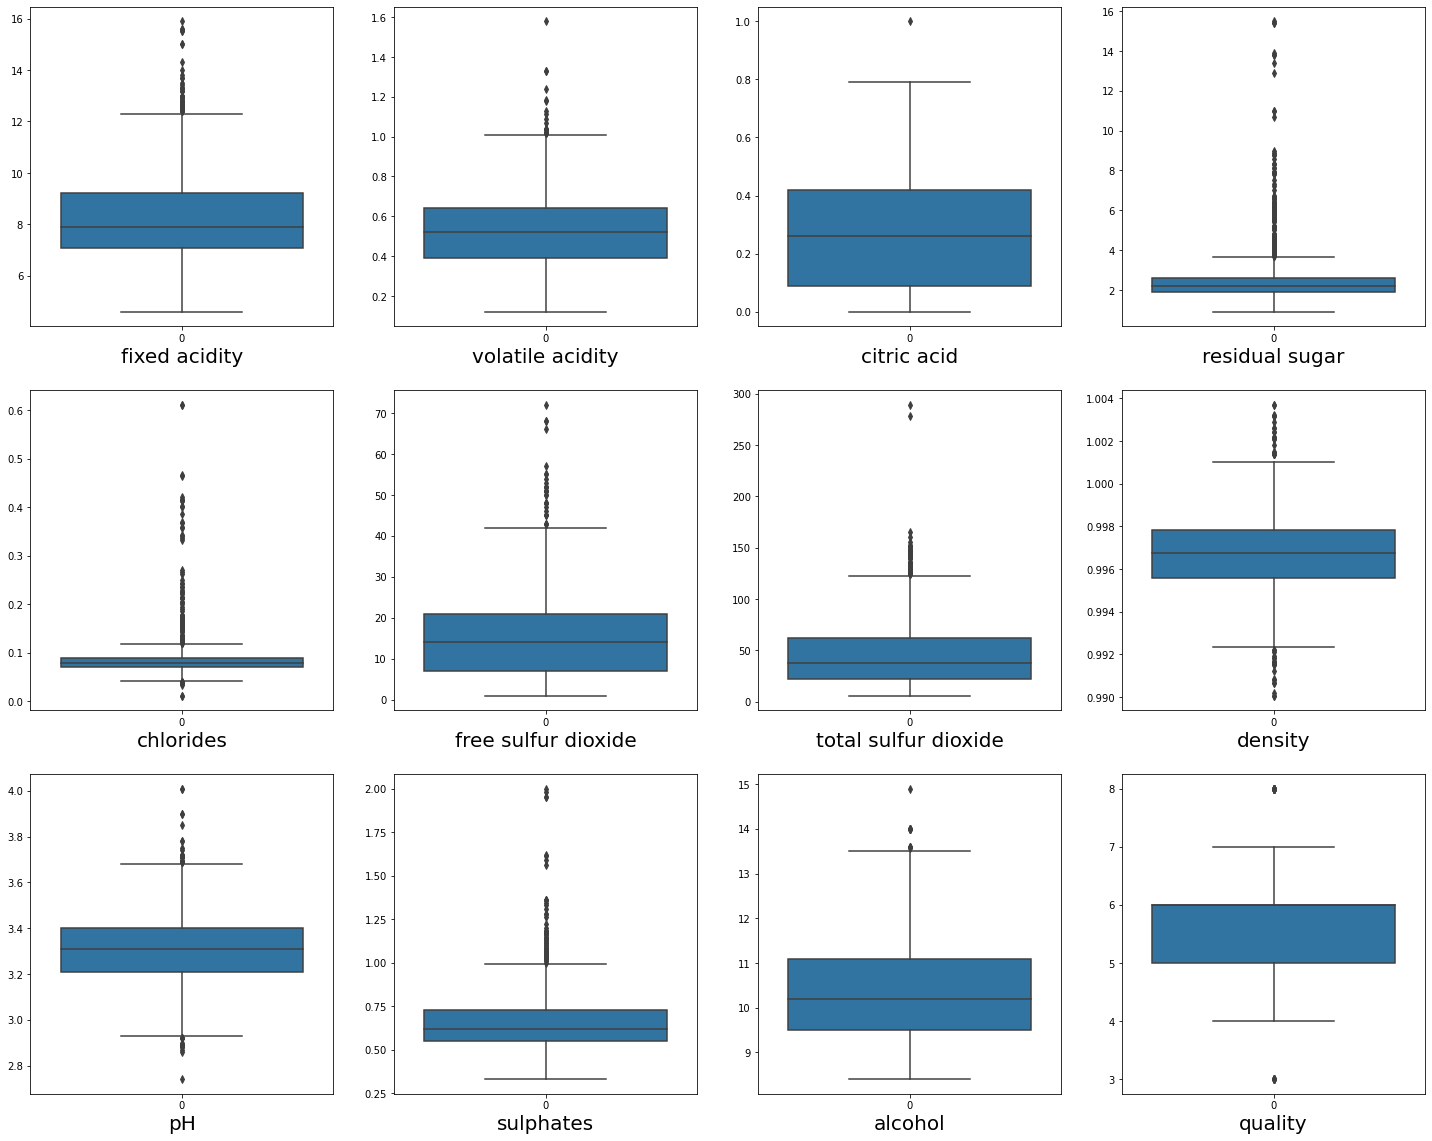

In [44]:
plt.figure(figsize=(25,20))
plotnumber = 1

for column in data:
    if plotnumber <=12:
        plt.subplot(3,4,plotnumber)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

 - We can see, all features is having outliers.

### Removing Duplicates from dataset

In [45]:
data.drop_duplicates(inplace=True)
data.shape

(1359, 12)

### Removing Outliers

In [46]:
from scipy.stats import zscore

z_score = zscore(data)
abs_z_score = np.abs(z_score)    

filtering_entry = (abs_z_score  < 3).all(axis=1)

df = data[filtering_entry]

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,8.303328,0.524144,0.266266,2.376948,0.081702,15.185877,44.353896,0.996673,3.313360,0.642192,10.425785,5.646916
std,1.649113,0.171969,0.190753,0.823759,0.022433,9.335015,30.051752,0.001714,0.140937,0.129924,1.038477,0.792639
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.500000,4.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.636250,0.420000,2.600000,0.089000,21.000000,60.000000,0.997800,3.400000,0.710000,11.100000,6.000000
max,13.500000,1.070000,0.790000,6.550000,0.236000,47.000000,147.000000,1.002200,3.750000,1.170000,13.600000,8.000000


In [47]:
df.shape

(1232, 12)

### Percentage of data loss

In [48]:
#  Data loss by Duplicate
data_loss = ((1599 - 1359)/1599*100)
print(data_loss)

15.0093808630394


In [49]:
# Data loss by Outliers
data_loss = ((1359 - 1232)/1359*100)
print(data_loss,'%')

9.345106696100073 %


## Separating columns into features and label

In [50]:
# resudual sugar is having 1% correlation with quality so i drop this feature.
x = df.drop(columns=['quality','residual sugar','fixed acidity','free sulfur dioxide'],axis=1)

# As i mension in EDA section, that <7 is a Bad Wine and >=7 is a Good wine
y = df['quality'].apply(lambda x: 1 if x >=7 else 0)

In [51]:
x.head()

,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4
1,0.88,0.00,0.098,67.0,0.9968,3.20,0.68,9.8
2,0.76,0.04,0.092,54.0,0.9970,3.26,0.65,9.8
3,0.28,0.56,0.075,60.0,0.9980,3.16,0.58,9.8
5,0.66,0.00,0.075,40.0,0.9978,3.51,0.56,9.4


In [52]:
y.head()

0    0
1    0
2    0
3    0
5    0
Name: quality, dtype: int64

In [53]:
y.value_counts()

0    1063
1     169
Name: quality, dtype: int64

### Transforming the data for removing skewness

In [54]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [55]:
from sklearn.preprocessing import StandardScaler

# transform my dataset into standard normal distribution
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.03575521, -1.52505116, -0.1330306 , ...,  1.37891163,
        -0.58673609, -1.10756191],
       [ 1.85701468, -1.52505116,  0.96045312, ..., -0.79834848,
         0.46222914, -0.52161598],
       [ 1.32423828, -1.24874749,  0.70250719, ..., -0.36196882,
         0.23014948, -0.52161598],
       ...,
       [ 0.23847117, -0.85860585, -1.08463601, ...,  1.44608831,
         1.00164562,  0.89325316],
       [ 0.75679489, -0.73451078, -0.19345553, ...,  1.77927806,
         0.6772225 , -0.0301104 ],
       [-1.32829519,  1.06752666, -0.71732912, ...,  0.55836264,
         0.3095092 ,  0.73704291]])

### Finding Best Random State

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [57]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.927027027027027 on Random State 410


### Balancing Datasaet

In [60]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=410)

In [62]:
ove_smp = SMOTE(1.0)

x_train_ns,y_train_ns = ove_smp.fit_sample(x_train,y_train)

print('The number of classes before fit {}'.format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 731, 1: 131})
The number of classes after fit Counter({1: 731, 0: 731})


## Model Building

### LogisticRegression

In [63]:
lr = LogisticRegression()
lr.fit(x_train_ns,y_train_ns)

y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.8108108108108109

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
pred_lr = lr.predict(x_test)
accu = accuracy_score(y_test,pred_lr)

In [66]:
for j in range(4,10):
    cross = cross_val_score(lr,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 88.14935064935064
accuracy_score is:- 81.08108108108108


At cv:- 5
Cross validation score is:- 87.5820414074586
accuracy_score is:- 81.08108108108108


At cv:- 6
Cross validation score is:- 87.90709606125188
accuracy_score is:- 81.08108108108108


At cv:- 7
Cross validation score is:- 87.90584415584416
accuracy_score is:- 81.08108108108108


At cv:- 8
Cross validation score is:- 87.82467532467533
accuracy_score is:- 81.08108108108108


At cv:- 9
Cross validation score is:- 88.3140117360813
accuracy_score is:- 81.08108108108108




In [68]:
lsscore_selected = cross_val_score(lr,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.883140117360813 
The accuracy score is:  0.8108108108108109


In [69]:
def metric_score(clf, x_train_ns,x_test,y_train_ns,y_test, train=True):
    if train:
        
        y_pred = clf.predict(x_train_ns)

        print("\n========================== Train Result=============================")

        print(f"Accuracy Score: {accuracy_score(y_train_ns, y_pred) * 100:.2f}%")

    
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n==========================Test Result=======================")
        print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
        
        print("\n \n Test Classification Report \n", classification_report(y_test, pred, digits=2))
        
       
    

In [70]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

### Random Forest

In [71]:
rf = RandomForestClassifier()
rf.fit(x_train_ns,y_train_ns)

y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9081081081081082

In [72]:
metric_score(rf,x_train_ns,x_test,y_train_ns, y_test, train=True)

metric_score(rf,x_train_ns,x_test,y_train_ns, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 100.00%

==========================Test Result=======================
Accuracy Score: 90.81%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       332
           1       0.54      0.71      0.61        38

    accuracy                           0.91       370
   macro avg       0.75      0.82      0.78       370
weighted avg       0.92      0.91      0.91       370



In [73]:
pred_rf = rf.predict(x_test)
accu = accuracy_score(y_test,pred_rf)

In [74]:
for j in range(4,10):
    cross = cross_val_score(rf,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 87.98701298701299
accuracy_score is:- 90.81081081081082


At cv:- 5
Cross validation score is:- 87.17553734241797
accuracy_score is:- 90.81081081081082


At cv:- 6
Cross validation score is:- 87.90709606125188
accuracy_score is:- 90.81081081081082


At cv:- 7
Cross validation score is:- 88.06818181818183
accuracy_score is:- 90.81081081081082


At cv:- 8
Cross validation score is:- 88.39285714285714
accuracy_score is:- 90.81081081081082


At cv:- 9
Cross validation score is:- 87.42068603597157
accuracy_score is:- 90.81081081081082




In [75]:
lsscore_selected = cross_val_score(rf,x,y,cv=8).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.8847402597402597 
The accuracy score is:  0.9081081081081082


### Hyperparameter Tuning

In [76]:
from sklearn.model_selection import GridSearchCV

In [78]:
# RandomForestClassifier
params = {'n_estimators':[13,15],
         'criterion':['entropy','gini'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}

grd = GridSearchCV(rf,param_grid = params)
grd.fit(x_train_ns,y_train_ns)

print('Best_params  = > ',grd.best_params_)

Best_params  = >  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [113]:
# reinstantiating with best params
rf = RandomForestClassifier(criterion='gini', max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=9)            

rf.fit(x_train_ns,y_train_ns)
metric_score(rf,x_train_ns,x_test,y_train_ns,y_test,train=True)  # Thiis is for training score

metric_score(rf,x_train_ns,x_test,y_train_ns,y_test,train=False)  



========================== Train Result=============================
Accuracy Score: 96.79%

==========================Test Result=======================
Accuracy Score: 90.27%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.91      0.94       332
           1       0.52      0.87      0.65        38

    accuracy                           0.90       370
   macro avg       0.75      0.89      0.80       370
weighted avg       0.94      0.90      0.91       370



### Gradient Boosting Classifier

In [114]:
gbt=GradientBoostingClassifier()
gbt.fit(x_train_ns,y_train_ns)


y_pred = gbt.predict(x_test)
accuracy_score(y_test,y_pred)

0.8783783783783784

In [115]:
metric_score(gbt,x_train_ns,x_test,y_train_ns, y_test, train=True)

metric_score(gbt,x_train_ns,x_test,y_train_ns, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 93.84%

==========================Test Result=======================
Accuracy Score: 87.84%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       332
           1       0.45      0.79      0.57        38

    accuracy                           0.88       370
   macro avg       0.71      0.84      0.75       370
weighted avg       0.92      0.88      0.89       370



In [116]:
pred_gbt = gbt.predict(x_test)

accu = accuracy_score(y_test,pred_gbt)
accu

0.8783783783783784

In [117]:
for j in range(4,10):
    cross = cross_val_score(gbt,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 87.01298701298701
accuracy_score is:- 87.83783783783784


At cv:- 5
Cross validation score is:- 86.77002073664461
accuracy_score is:- 87.83783783783784


At cv:- 6
Cross validation score is:- 87.66082563738259
accuracy_score is:- 87.83783783783784


At cv:- 7
Cross validation score is:- 87.66233766233766
accuracy_score is:- 87.83783783783784


At cv:- 8
Cross validation score is:- 88.14935064935064
accuracy_score is:- 87.83783783783784


At cv:- 9
Cross validation score is:- 87.66399503840465
accuracy_score is:- 87.83783783783784




In [118]:
lsscore_selected = cross_val_score(gbt,x,y,cv=8).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.8814935064935064 
The accuracy score is:  0.8783783783783784


### Hyperparameter Tuning

In [132]:
grid_param = {
    'max_depth': range(4,8),
    'min_samples_split': range(2,8,2),
    'learning_rate': np.arange(0.1,0.3)
}

In [134]:
grid = GridSearchCV(gbt, param_grid=grid_param)

grid.fit(x_train_ns,y_train_ns)

print(grid.best_estimator_)

GradientBoostingClassifier(max_depth=7, min_samples_split=4)


In [146]:
gbt = GradientBoostingClassifier(max_depth=7,min_samples_split=4, learning_rate=0.1)

gbt.fit(x_train_ns,y_train_ns)

metric_score(gbt,x_train_ns,x_test,y_train_ns,y_test, train=True)  # This is for training score

metric_score(gbt,x_train_ns,x_test,y_train_ns,y_test, train=False) # This is for testing score



========================== Train Result=============================
Accuracy Score: 100.00%

==========================Test Result=======================
Accuracy Score: 90.27%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       332
           1       0.52      0.66      0.58        38

    accuracy                           0.90       370
   macro avg       0.74      0.79      0.76       370
weighted avg       0.91      0.90      0.91       370



### XGBoost

In [119]:
import xgboost as xgb
xgb = xgb.XGBClassifier()

xgb.fit(x_train_ns,y_train_ns)

metric_score(xgb,x_train_ns,x_test,y_train_ns, y_test, train=True)

metric_score(xgb,x_train_ns,x_test,y_train_ns, y_test, train=False)


[21:34:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

========================== Train Result=============================
Accuracy Score: 100.00%

==========================Test Result=======================
Accuracy Score: 88.92%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       332
           1       0.47      0.66      0.55        38

    accuracy                           0.89       370
   macro avg       0.72      0.79      0.74       370
weighted avg       0.91      0.89      0.90       370



### DecisionTree

In [120]:
dt=DecisionTreeClassifier()
dt.fit(x_train_ns,y_train_ns)


y_pred = dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.8567567567567568

In [121]:
metric_score(dt,x_train_ns,x_test,y_train_ns, y_test, train=True)

metric_score(dt,x_train_ns,x_test,y_train_ns, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 100.00%

==========================Test Result=======================
Accuracy Score: 85.68%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       332
           1       0.38      0.66      0.49        38

    accuracy                           0.86       370
   macro avg       0.67      0.77      0.70       370
weighted avg       0.90      0.86      0.87       370



In [122]:
pred_dt = dt.predict(x_test)

accu = accuracy_score(y_test,pred_dt)

In [123]:
for j in range(4,10):
    cross = cross_val_score(dt,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 82.46753246753246
accuracy_score is:- 85.67567567567568


At cv:- 5
Cross validation score is:- 81.5700602350153
accuracy_score is:- 85.67567567567568


At cv:- 6
Cross validation score is:- 82.13789565080117
accuracy_score is:- 85.67567567567568


At cv:- 7
Cross validation score is:- 83.36038961038962
accuracy_score is:- 85.67567567567568


At cv:- 8
Cross validation score is:- 84.4155844155844
accuracy_score is:- 85.67567567567568


At cv:- 9
Cross validation score is:- 84.00958923715471
accuracy_score is:- 85.67567567567568




In [124]:
lsscore_selected = cross_val_score(dt,x,y,cv=4).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.8311688311688312 
The accuracy score is:  0.8567567567567568


### SVC

In [125]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train_ns,y_train_ns)

metric_score(svc,x_train_ns,x_test,y_train_ns, y_test, train=True)

metric_score(svc,x_train_ns,x_test,y_train_ns, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 87.69%

==========================Test Result=======================
Accuracy Score: 84.86%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.85      0.91       332
           1       0.39      0.84      0.53        38

    accuracy                           0.85       370
   macro avg       0.68      0.85      0.72       370
weighted avg       0.92      0.85      0.87       370



In [126]:
pred_svc = svc.predict(x_test)

accu = accuracy_score(y_test,pred_svc)

for j in range(4,10):
    cross = cross_val_score(svc,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')


At cv:- 4
Cross validation score is:- 82.62987012987011
accuracy_score is:- 84.86486486486487


At cv:- 5
Cross validation score is:- 81.41009183371185
accuracy_score is:- 84.86486486486487


At cv:- 6
Cross validation score is:- 81.73218091404215
accuracy_score is:- 84.86486486486487


At cv:- 7
Cross validation score is:- 83.19805194805195
accuracy_score is:- 84.86486486486487


At cv:- 8
Cross validation score is:- 84.98376623376623
accuracy_score is:- 84.86486486486487


At cv:- 9
Cross validation score is:- 84.17119889318259
accuracy_score is:- 84.86486486486487




In [127]:
lsscore_selected = cross_val_score(svc,x,y,cv=8).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.8814935064935066 
The accuracy score is:  0.8486486486486486


### KNN

In [128]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_ns,y_train_ns)

metric_score(knn,x_train_ns,x_test,y_train_ns, y_test, train=True)

metric_score(knn,x_train_ns,x_test,y_train_ns, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 90.42%

==========================Test Result=======================
Accuracy Score: 80.27%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.80      0.88       332
           1       0.32      0.79      0.45        38

    accuracy                           0.80       370
   macro avg       0.64      0.80      0.67       370
weighted avg       0.90      0.80      0.84       370



In [129]:
pred_knn = knn.predict(x_test)

accu = accuracy_score(y_test,pred_knn)

In [130]:
for j in range(4,10):
    cross = cross_val_score(knn,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 86.76948051948051
accuracy_score is:- 80.27027027027027


At cv:- 5
Cross validation score is:- 85.87637009973339
accuracy_score is:- 80.27027027027027


At cv:- 6
Cross validation score is:- 86.04072933933223
accuracy_score is:- 80.27027027027027


At cv:- 7
Cross validation score is:- 86.28246753246752
accuracy_score is:- 80.27027027027027


At cv:- 8
Cross validation score is:- 86.68831168831169
accuracy_score is:- 80.27027027027027


At cv:- 9
Cross validation score is:- 86.77245837507752
accuracy_score is:- 80.27027027027027




In [131]:
lsscore_selected = cross_val_score(knn,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.8677245837507752 
The accuracy score is:  0.8027027027027027


### ROC_AUC Curve

In [148]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

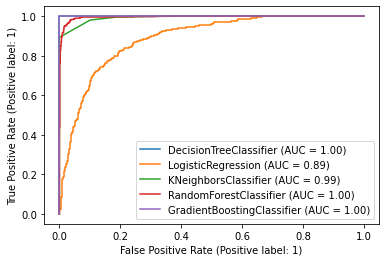

In [149]:
# AUC Curve For Training
disp = plot_roc_curve(dt,x_train_ns,y_train_ns)

plot_roc_curve(lr,x_train_ns,y_train_ns, ax=disp.ax_)

plot_roc_curve(knn,x_train_ns,y_train_ns, ax=disp.ax_)

plot_roc_curve(rf,x_train_ns,y_train_ns, ax=disp.ax_)

plot_roc_curve(gbt, x_train_ns,y_train_ns, ax=disp.ax_)

plt.legend(prop={'size':10}, loc='lower right')

plt.show()

<Figure size 1440x1080 with 0 Axes>

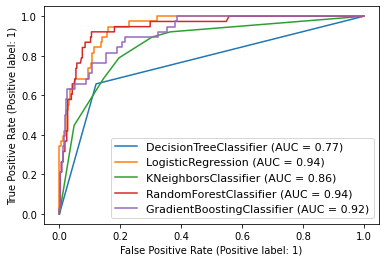

In [150]:
# AUC curve for testing

plt.figure(figsize=(20,15))

disp = plot_roc_curve(dt,x_test,y_test)

plot_roc_curve(lr,x_test,y_test, ax=disp.ax_)

plot_roc_curve(knn,x_test,y_test, ax=disp.ax_)

plot_roc_curve(rf,x_test,y_test, ax=disp.ax_)

plot_roc_curve(gbt, x_test,y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')

plt.show()

## Conclusion

### By using RandomForestClassifier, we are getting model accuracy as 90.27% which show our model is performing extremly well.

### Model Save

In [128]:
import pickle
wine = 'Red_wine.pkl'
pickle.dump(rf, open(wine, 'wb'))